# Learn and Understand Zipf Law

# Requirement
* **Use glob to open file**
* **Use Atleast One Lambda Function**
* **Save Data as CSV and store rank word and frequency**
* **Create a log-log graph for above from csv file**
* **Write a Conclusion**

# Zipf Law
* **Zipf’s Law states that the frequency of a word in a corpus of text is proportional to it’s rank, to check Zipf’s Law on our corpus,Unlike a “law” in the sense of mathematics or physics, this is purely on observation, without strong explanation there are two steps: **
* **sorting the words by their frequency** 
* **plotting the data.**

In [62]:
#Using NLTK package and importing gutenberg corpus
from nltk.corpus import gutenberg
import os
#dirname="/Users/shivamgoel/Desktop/Python/Spandan/Data/"
#Setting  the Working Directory so that we dont have to change everytime.We can use input to take input in comand line
dirname=input("Enter the Working Directory path in your system")
direc = os.chdir(dirname) # Set current working directory
direc = os.getcwd() # Get current working directory
file_list=os.listdir(dirname)

Enter the Working Directory path in your system/Users/shivamgoel/Desktop/Python/Spandan/Data/


In [39]:
# using glob to read all nltk webtext.
from glob import glob

words = []
for textfile in glob("/Users/shivamgoel/nltk_data/corpora/gutenberg/*.txt"):
    if textfile.startswith('/Users/shivamgoel/nltk_data/corpora/gutenberg/bible'):
        words.extend(gutenberg.words(textfile))


In [40]:
#Importing Regix Library to remove the punctutions
import re
#Function to change all the values to lower case
def low(l):
    w=[w.lower() for w in l]
    return w
punctuations =re.compile('\W+|(\d+)')
#Lamba function to remvoe the punctuations
result = lambda p: [word for word in p if not punctuations.match(word)]
#Lower the result
lower=low(words)
#filter the result
filtwords=result(lower)

In [42]:
#Importing csv to write the frequency work and rank in file
import csv
wordfreq = {}#To store word and frequency

for word in filtwords:      #Checking each word in the text and incrementing their count.
    if word not in wordfreq:
        wordfreq[word] = 1
    else:
        wordfreq[word] += 1
with open('wordrank.csv', 'w') as csvfile:
    fieldnames = ['Word', 'Rank', 'Frequency']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    i=0
    for x in sorted(wordfreq, key=wordfreq.get, reverse=True):
        i +=1
        writer.writerow({'Word': x, 'Rank': i, 'Frequency': wordfreq[x]})

In [51]:
#Reading csv file to plot graph
with open('wordrank.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        Word=[]#Store word
        Rank=[]#Store Rank
        Frequency=[]#Store Frequency
        for row in reader:
            Word.append(row[0])
            Rank.append(row[1])
            Frequency.append(row[2])
Rank.remove('Rank')
Frequency.remove('Frequency')
len(Word)

12569

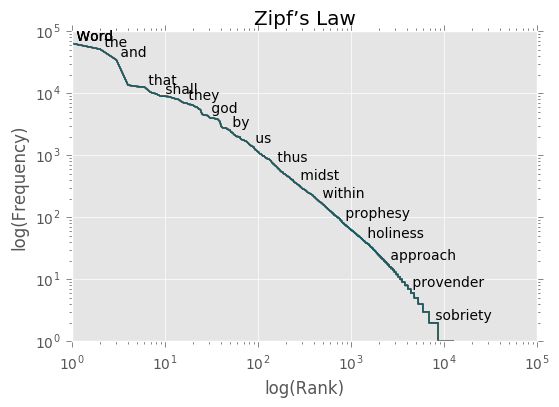

In [59]:
#importing matplotlib to plot graph
import matplotlib.pyplot as plt

exportFig = 'Graph.png'
plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')

plt.loglog(Rank,Frequency)
plt.title("Zipf’s Law")#Giving title to graph
plt.ylabel('log(Frequency)')
plt.xlabel('log(Rank)')
plt.savefig(exportFig, bbox_inches='tight')#Saving graph to location

plt.show()#Plotting graph

# Conclusion

* **Clearly the log-log plot is roughly linear, confirming a Zipf distribution**
* **Zipf's Law says that the frequency of occurrence of an instance of a class is roughly inversely proportional to the rank of that class in the frequency list**
* **Above Graph also represent the word which is more frequent and it clearly says that is inversly proportional to rank which in above case word "the" has top rank **
* **There are various ways of plotting the distribution of highly skewed (heavy-tailed) data, e.g., with a histogram with logarithmically-spaced bins on a log-log plot, or by generating a Zipf-like plot (rank-frequency plot) like the above**
* **We can Clearly conclude that Zipf law hold true for the gutenberg package**
